# Sismos en México

    ¿Si retiembla en sus centros la tierra?

## DEFINCION DE HIPOTESIS

Ocurren más temblores en Septiembre.


In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import math

In [2]:
df_T = pd.read_csv('TEMBLORES_2.csv')

C:\Users\luisl\AppData\Local\Temp\ipykernel_4676\3776067952.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_T = pd.read_csv('TEMBLORES_2.csv')


In [3]:
df_T

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,29/09/1950,00:32:20,7,19.00,-107.00,60,"257 km al SUROESTE de PUERTO VALLARTA, JAL",29/09/1950,06:32:20,revisado
1,21/10/1950,03:42:58,6.6,17.73,-106.00,33,"225 km al SUROESTE de CIHUATLAN, JAL",21/10/1950,09:42:58,revisado
2,23/10/1950,10:13:20,7.2,14.30,-91.80,33,"56 km al SURESTE de CD HIDALGO, CHIS",23/10/1950,16:13:20,revisado
3,17/11/1950,13:28:23,6.6,17.50,-100.50,33,"33 km al NORTE de ATOYAC DE ALVAREZ, GRO",17/11/1950,19:28:23,revisado
4,14/12/1950,08:15:50,7.2,17.22,-98.12,33,"47 km al OESTE de H TLAXIACO, OAX",14/12/1950,14:15:50,revisado
...,...,...,...,...,...,...,...,...,...,...
281895,Los registros con estatus verificado son los c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281896,Los registros obtienen estatus revisado cuando...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281897,Esta informacion puede ser reproducida con fin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281898,Consulta nuestro Aviso Legal y Terminos de Uso...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Limpieza de datos

Se deben de obtener los registros de los estados en donde ocurren sismos que pueden afectar a la Ciudad de México. Estos estados son: Jalisco, Colima, Michoacán, Guerrero, Oaxaca, Puebla, Estado de México y Veracruz. 

In [4]:
patrones= r', VER$|, OAX$|, MICH$|, BC$|, PUE$|, MEXICO$|, EDOMEX$|, MEX$|, JALISCO$|, CHIAPAS$|, GRO$|, JAL$|, CHIS$|, COL$'

In [5]:
# AQUI HAREMOS LA FUNCION PARA ENCONTRAR LOS PATRONES
def Ciudades(patron, columna):
    for i in columna:
        respuesta = re.search(patron, i)
        if respuesta:
            print (i)

In [6]:
# Limpieza del DataFrame
df_T.drop(281899, inplace=True)
df_T.drop(281898, inplace=True)
df_T.drop(281897, inplace=True)
df_T.drop(281896, inplace=True)
df_T.drop(281895, inplace=True)
df_T.drop(281894, inplace=True)
df_T.drop(281893, inplace=True)

In [7]:
resultados = df_T[df_T['Referencia de localizacion'].str.contains(patrones, regex=True)]

# Obtener los datos completos de los registros que cumplen con el patrón
datos_completos = df_T.loc[resultados.index]

In [8]:
datos_completos

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,29/09/1950,00:32:20,7,19.00,-107.00,60,"257 km al SUROESTE de PUERTO VALLARTA, JAL",29/09/1950,06:32:20,revisado
1,21/10/1950,03:42:58,6.6,17.73,-106.00,33,"225 km al SUROESTE de CIHUATLAN, JAL",21/10/1950,09:42:58,revisado
2,23/10/1950,10:13:20,7.2,14.30,-91.80,33,"56 km al SURESTE de CD HIDALGO, CHIS",23/10/1950,16:13:20,revisado
3,17/11/1950,13:28:23,6.6,17.50,-100.50,33,"33 km al NORTE de ATOYAC DE ALVAREZ, GRO",17/11/1950,19:28:23,revisado
4,14/12/1950,08:15:50,7.2,17.22,-98.12,33,"47 km al OESTE de H TLAXIACO, OAX",14/12/1950,14:15:50,revisado
...,...,...,...,...,...,...,...,...,...,...
275326,06/03/2023,13:53:21,4.0,18.08,-104.20,2.9,"98 km al SUR de CD DE ARMERIA, COL",06/03/2023,19:53:21,verificado
276225,18/03/2023,13:11:18,3.6,19.54,-102.30,14.7,"12 km al ESTE de PERIBAN, MICH",18/03/2023,19:11:18,verificado
278328,18/04/2023,22:55:31,5.1,17.22,-101.12,16.3,"38 km al SURESTE de PETATLAN, GRO",19/04/2023,04:55:31,verificado
278495,21/04/2023,03:32:46,3.5,30.76,-114.62,2.3,"36 km al SURESTE de SAN FELIPE, BC",21/04/2023,09:32:46,verificado


In [9]:
#Eliminando columnas que no nos sirven
columnas_a_eliminar = ['Fecha UTC', 'Hora UTC','Estatus']
datos_completos.drop(columnas_a_eliminar, axis=1, inplace=True)

In [10]:
datos_completos

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion
0,29/09/1950,00:32:20,7,19.00,-107.00,60,"257 km al SUROESTE de PUERTO VALLARTA, JAL"
1,21/10/1950,03:42:58,6.6,17.73,-106.00,33,"225 km al SUROESTE de CIHUATLAN, JAL"
2,23/10/1950,10:13:20,7.2,14.30,-91.80,33,"56 km al SURESTE de CD HIDALGO, CHIS"
3,17/11/1950,13:28:23,6.6,17.50,-100.50,33,"33 km al NORTE de ATOYAC DE ALVAREZ, GRO"
4,14/12/1950,08:15:50,7.2,17.22,-98.12,33,"47 km al OESTE de H TLAXIACO, OAX"
...,...,...,...,...,...,...,...
275326,06/03/2023,13:53:21,4.0,18.08,-104.20,2.9,"98 km al SUR de CD DE ARMERIA, COL"
276225,18/03/2023,13:11:18,3.6,19.54,-102.30,14.7,"12 km al ESTE de PERIBAN, MICH"
278328,18/04/2023,22:55:31,5.1,17.22,-101.12,16.3,"38 km al SURESTE de PETATLAN, GRO"
278495,21/04/2023,03:32:46,3.5,30.76,-114.62,2.3,"36 km al SURESTE de SAN FELIPE, BC"


In [11]:
datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255930 entries, 0 to 281474
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Fecha                       255930 non-null  object 
 1   Hora                        255930 non-null  object 
 2   Magnitud                    255930 non-null  object 
 3   Latitud                     255930 non-null  float64
 4   Longitud                    255930 non-null  float64
 5   Profundidad                 255930 non-null  object 
 6   Referencia de localizacion  255930 non-null  object 
dtypes: float64(2), object(5)
memory usage: 15.6+ MB


In [12]:
# Cambiamos el tipo de dato de magnitud ya que nos aparece que es un string y lo queremos en float
# Reemplazar los valores no numéricos por NaN
datos_completos['Magnitud'].replace('no calculable', np.nan, inplace=True)

# Cambiar el tipo de dato de la columna a float
datos_completos['Magnitud'] = datos_completos['Magnitud'].astype(float)

In [13]:
datos_completos = datos_completos[datos_completos['Profundidad'] != 'en revision']

In [14]:
datos_completos = (datos_completos.loc[datos_completos['Profundidad'] != 'menos de 1'])

In [15]:
# Reemplazar 'no calculable' por NaN en la columna 'Profundidad'
datos_completos.loc[datos_completos['Profundidad'] == 'no calculable', 'Profundidad'] = np.nan

# Convertir la columna 'Profundidad' a tipo float
datos_completos['Profundidad'] = datos_completos['Profundidad'].astype(float)

In [16]:
datos_completos.isna().sum()

Fecha                             0
Hora                              0
Magnitud                      16944
Latitud                           0
Longitud                          0
Profundidad                       0
Referencia de localizacion        0
dtype: int64

In [17]:
# COMO VEMOS LOS DATOS QUE NOS APARECEN NULOS SON TEMBLORES QUE FUERON DEMASIADO PEQUEÑOS O QUE NO SE PUDIERON CALCULAR 
# ASI QUE LOS ELIMINAREMOS 
datos_completos.dropna(inplace=True)

Se hizo un filtro para ver si habia datos ilogicos de que la magnitud fuera menor que 1, o mayor que 10 para investigar si en verdad ocurrio un temblor asi, ya que si ocurriera un temblor de esa magnitud, acabaria con muchas ciudades

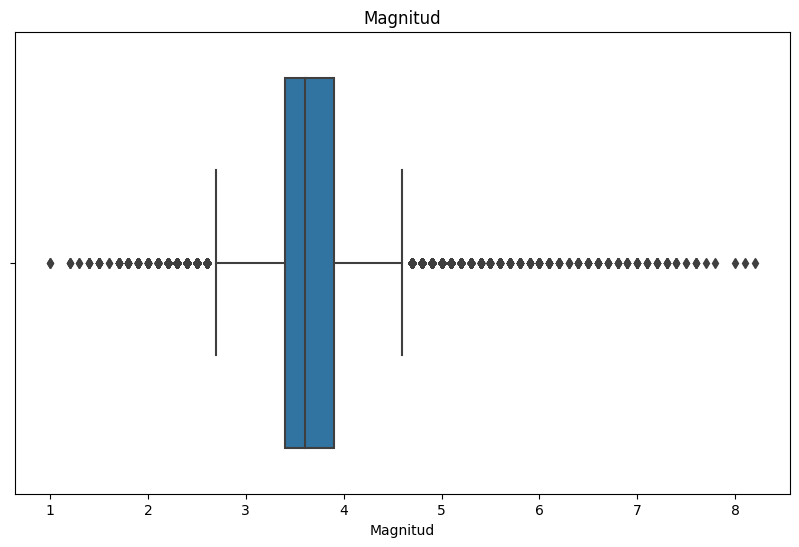

In [18]:
cols_num = ['Magnitud']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=datos_completos, ax=ax)
    ax.set_title(col)

Ahora lo que haremos sera pasar lo que es fecha y hora a un formato donde podamos manejarlo como numerico y ver si hay una cierta correlacion entre los datos

In [19]:
# CONVIRTIENDO LOS DATOS DE LA COLUMNA FECHA A UN FORMATO FECHA PARA PODER VER SI HAY ALGUNA CORRELACION 
datos_completos['Fecha'] = pd.to_datetime(datos_completos['Fecha'], format="%d/%m/%Y")

In [20]:
datos_completos['Dias_De_La_Semana'] = datos_completos['Fecha'].dt.day_of_week
datos_completos

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Dias_De_La_Semana
0,1950-09-29,00:32:20,7.0,19.00,-107.00,60.0,"257 km al SUROESTE de PUERTO VALLARTA, JAL",4
1,1950-10-21,03:42:58,6.6,17.73,-106.00,33.0,"225 km al SUROESTE de CIHUATLAN, JAL",5
2,1950-10-23,10:13:20,7.2,14.30,-91.80,33.0,"56 km al SURESTE de CD HIDALGO, CHIS",0
3,1950-11-17,13:28:23,6.6,17.50,-100.50,33.0,"33 km al NORTE de ATOYAC DE ALVAREZ, GRO",4
4,1950-12-14,08:15:50,7.2,17.22,-98.12,33.0,"47 km al OESTE de H TLAXIACO, OAX",3
...,...,...,...,...,...,...,...,...
275326,2023-03-06,13:53:21,4.0,18.08,-104.20,2.9,"98 km al SUR de CD DE ARMERIA, COL",0
276225,2023-03-18,13:11:18,3.6,19.54,-102.30,14.7,"12 km al ESTE de PERIBAN, MICH",5
278328,2023-04-18,22:55:31,5.1,17.22,-101.12,16.3,"38 km al SURESTE de PETATLAN, GRO",1
278495,2023-04-21,03:32:46,3.5,30.76,-114.62,2.3,"36 km al SURESTE de SAN FELIPE, BC",4


In [21]:
datos_completos['Mes_Numerico'] = datos_completos['Fecha'].dt.month
datos_completos

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Dias_De_La_Semana,Mes_Numerico
0,1950-09-29,00:32:20,7.0,19.00,-107.00,60.0,"257 km al SUROESTE de PUERTO VALLARTA, JAL",4,9
1,1950-10-21,03:42:58,6.6,17.73,-106.00,33.0,"225 km al SUROESTE de CIHUATLAN, JAL",5,10
2,1950-10-23,10:13:20,7.2,14.30,-91.80,33.0,"56 km al SURESTE de CD HIDALGO, CHIS",0,10
3,1950-11-17,13:28:23,6.6,17.50,-100.50,33.0,"33 km al NORTE de ATOYAC DE ALVAREZ, GRO",4,11
4,1950-12-14,08:15:50,7.2,17.22,-98.12,33.0,"47 km al OESTE de H TLAXIACO, OAX",3,12
...,...,...,...,...,...,...,...,...,...
275326,2023-03-06,13:53:21,4.0,18.08,-104.20,2.9,"98 km al SUR de CD DE ARMERIA, COL",0,3
276225,2023-03-18,13:11:18,3.6,19.54,-102.30,14.7,"12 km al ESTE de PERIBAN, MICH",5,3
278328,2023-04-18,22:55:31,5.1,17.22,-101.12,16.3,"38 km al SURESTE de PETATLAN, GRO",1,4
278495,2023-04-21,03:32:46,3.5,30.76,-114.62,2.3,"36 km al SURESTE de SAN FELIPE, BC",4,4


In [22]:
datos_completos.shape

(238974, 9)

In [23]:
datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238974 entries, 0 to 281474
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Fecha                       238974 non-null  datetime64[ns]
 1   Hora                        238974 non-null  object        
 2   Magnitud                    238974 non-null  float64       
 3   Latitud                     238974 non-null  float64       
 4   Longitud                    238974 non-null  float64       
 5   Profundidad                 238974 non-null  float64       
 6   Referencia de localizacion  238974 non-null  object        
 7   Dias_De_La_Semana           238974 non-null  int64         
 8   Mes_Numerico                238974 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 18.2+ MB


In [24]:
print(f'El numero de datos que eliminamos fueron {df_T.shape[0]- datos_completos.shape[0]}')

El numero de datos que eliminamos fueron 42919


### Análisis de los datos

#### Ya con el dataframe listo, procederemos a contestar las siguienres preguntas:

* ¿Cuál es el número total de temblores registrados?

In [25]:
# El numero total de temblores registrados en la zona que nos interesa es de:
print(f'El numero total de temblores en la zona que nos interesa es de: {datos_completos.shape[0]}')

El numero total de temblores en la zona que nos interesa es de: 238974


* ¿Cuántos temblores ocurrieron en cada mes?

In [26]:

def Temblores_en_mes(dataframe , num_mes):
    num = dataframe.loc[(dataframe['Fecha'].dt.month == num_mes)].shape[0]
    return num

In [27]:
# TEMBLORES POR MES
T_Ene = Temblores_en_mes(datos_completos, 1)
T_Feb = Temblores_en_mes(datos_completos, 2)
T_Mar = Temblores_en_mes(datos_completos, 3)
T_Abr = Temblores_en_mes(datos_completos, 4)
T_May = Temblores_en_mes(datos_completos, 5)
T_Jun = Temblores_en_mes(datos_completos, 6)
T_Jul = Temblores_en_mes(datos_completos, 7)
T_Ags = Temblores_en_mes(datos_completos, 8)
T_Sep = Temblores_en_mes(datos_completos, 9)
T_Oct = Temblores_en_mes(datos_completos, 10)
T_Nov = Temblores_en_mes(datos_completos, 11)
T_Dec = Temblores_en_mes(datos_completos, 12)

In [28]:
print(f'TEMBLORES OCURRIDOS EN EL MES DE ENERO: {T_Ene}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE FBERERO: {T_Feb}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE MAZO: {T_Mar}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE ABRIL: {T_Abr}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE MAYO: {T_May}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE JUNIO: {T_Jun}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE JULIO: {T_Jul}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE AGOSTO {T_Ags}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE SEPTIEMBRE {T_Sep}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE OCTUBRE {T_Oct}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE NOVIEMBRE {T_Nov}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE DICIEMBRE {T_Dec}')

TEMBLORES OCURRIDOS EN EL MES DE ENERO: 21748
TEMBLORES OCURRIDOS EN EL MES DE FBERERO: 21369
TEMBLORES OCURRIDOS EN EL MES DE MAZO: 19755
TEMBLORES OCURRIDOS EN EL MES DE ABRIL: 18517
TEMBLORES OCURRIDOS EN EL MES DE MAYO: 18297
TEMBLORES OCURRIDOS EN EL MES DE JUNIO: 18614
TEMBLORES OCURRIDOS EN EL MES DE JULIO: 18058
TEMBLORES OCURRIDOS EN EL MES DE AGOSTO 17654
TEMBLORES OCURRIDOS EN EL MES DE SEPTIEMBRE 22949
TEMBLORES OCURRIDOS EN EL MES DE OCTUBRE 18565
TEMBLORES OCURRIDOS EN EL MES DE NOVIEMBRE 21383
TEMBLORES OCURRIDOS EN EL MES DE DICIEMBRE 22065


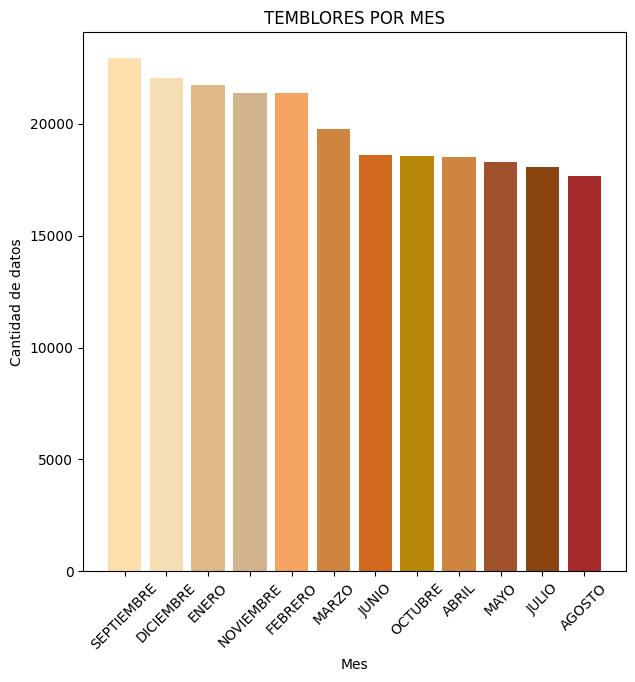

In [29]:
meses = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']
datos = [21751, 21369, 19757, 18518, 18297, 18616, 18058, 17655, 22949, 18566, 21384, 22066]
colores = ['navajowhite', 'wheat', 'burlywood', 'tan', 'sandybrown', 'peru', 'chocolate', 'darkgoldenrod', '#CD853F', '#A0522D', '#8B4513', 'brown']

datos_ordenados = sorted(zip(datos, meses), reverse=True)
datos_ordenados, meses_ordenados = zip(*datos_ordenados)

plt.figure(figsize=(7,7))
plt.bar(meses_ordenados, datos_ordenados, color=colores)
plt.xlabel('Mes')
plt.ylabel('Cantidad de datos')
plt.title('TEMBLORES POR MES')
plt.xticks(rotation=45)
plt.show()

In [30]:

def Magnitudes_en_mes(dataframe , num_mes):
    num = dataframe.loc[(dataframe['Fecha'].dt.month == num_mes)&(dataframe['Magnitud']>=6.5)].shape[0]
    return num

In [31]:

M_Ene = Magnitudes_en_mes(datos_completos, 1)
M_Feb = Magnitudes_en_mes(datos_completos, 2)
M_Mar = Magnitudes_en_mes(datos_completos, 3)
M_Abr = Magnitudes_en_mes(datos_completos, 4)
M_May = Magnitudes_en_mes(datos_completos, 5)
M_Jun = Magnitudes_en_mes(datos_completos, 6)
M_Jul = Magnitudes_en_mes(datos_completos, 7)
M_Ags = Magnitudes_en_mes(datos_completos, 8)
M_Sep = Magnitudes_en_mes(datos_completos, 9)
M_Oct = Magnitudes_en_mes(datos_completos, 10)
M_Nov = Magnitudes_en_mes(datos_completos, 11)
M_Dec = Magnitudes_en_mes(datos_completos, 12)

In [32]:
print(f'TEMBLORES OCURRIDOS EN EL MES DE ENERO: {M_Ene}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE FBERERO: {M_Feb}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE MAZO: {M_Mar}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE ABRIL: {M_Abr}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE MAYO: {M_May}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE JUNIO: {M_Jun}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE JULIO: {M_Jul}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE AGOSTO {M_Ags}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE SEPTIEMBRE {M_Sep}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE OCTUBRE {M_Oct}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE NOVIEMBRE {M_Nov}')
print(f'TEMBLORES OCURRIDOS EN EL MES DE DICIEMBRE {M_Dec}')

TEMBLORES OCURRIDOS EN EL MES DE ENERO: 9
TEMBLORES OCURRIDOS EN EL MES DE FBERERO: 6
TEMBLORES OCURRIDOS EN EL MES DE MAZO: 6
TEMBLORES OCURRIDOS EN EL MES DE ABRIL: 11
TEMBLORES OCURRIDOS EN EL MES DE MAYO: 7
TEMBLORES OCURRIDOS EN EL MES DE JUNIO: 9
TEMBLORES OCURRIDOS EN EL MES DE JULIO: 8
TEMBLORES OCURRIDOS EN EL MES DE AGOSTO 7
TEMBLORES OCURRIDOS EN EL MES DE SEPTIEMBRE 14
TEMBLORES OCURRIDOS EN EL MES DE OCTUBRE 12
TEMBLORES OCURRIDOS EN EL MES DE NOVIEMBRE 7
TEMBLORES OCURRIDOS EN EL MES DE DICIEMBRE 9


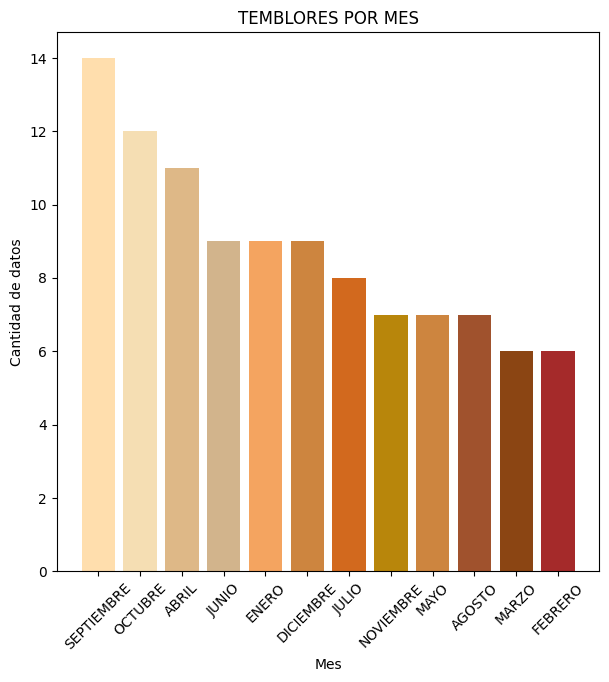

In [33]:
datos = [9, 6, 6, 11, 7, 9, 8, 7, 14, 12, 7, 9]
colores = ['navajowhite', 'wheat', 'burlywood', 'tan', 'sandybrown', 'peru', 'chocolate', 'darkgoldenrod', '#CD853F', '#A0522D', '#8B4513', 'brown']

datos_ordenados = sorted(zip(datos, meses), reverse=True)
datos_ordenados, meses_ordenados = zip(*datos_ordenados)

plt.figure(figsize=(7,7))
plt.bar(meses_ordenados, datos_ordenados, color=colores)
plt.xlabel('Mes')
plt.ylabel('Cantidad de datos')
plt.title('TEMBLORES POR MES')
plt.xticks(rotation=45)
plt.show()

* ¿Cuál es la magnitud promedio de los temblores registrados?

In [34]:
# La magnitud promedido de los temblores registrados en la zona que nos interesa es: 

print(f'La magnitud promedio de los temblores es: {datos_completos["Magnitud"].mean()}')

La magnitud promedio de los temblores es: 3.648524944136182


* ¿Cuál fue el temblor de mayor magnitud registrado?

In [35]:
# El temblor de mayor magnitud registrado en todo el dataframe es de:
print(f'La maxima magnitud registrada en todo el dataframe es de: {datos_completos["Magnitud"].max()}')

La maxima magnitud registrada en todo el dataframe es de: 8.2


* ¿En qué fecha y ubicación ocurrió el temblor de mayor magnitud?

In [36]:
datos_completos.loc[datos_completos['Magnitud']>8]

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Dias_De_La_Semana,Mes_Numerico
16589,1985-09-19,07:17:49,8.1,18.419,-102.468,15.0,"45 km al NOROESTE de LA MIRA, MICH",3,9
109220,2017-09-07,23:49:17,8.2,14.761,-94.103,45.9,"140 km al SUROESTE de PIJIJIAPAN, CHIS",3,9


El temblor mas fuerte registrado ocurrio en el año 2017 del mes de septiembre el dia 7 osea El dia jueves a las 11 con 49 min y 17 segundos.

El epicentro fue 140 km al SUROESTE de PIJIJIAPAN, CHIAPAS, y con las coordenadas que nos dan es la playa de cocos.

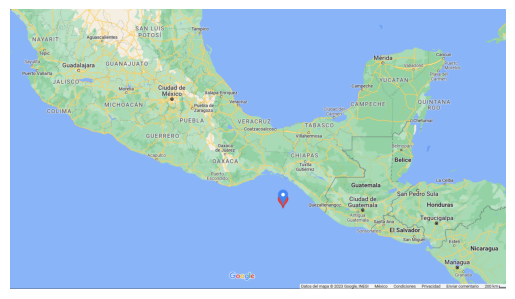

In [37]:
from PIL import Image

# Abrir la imagen utilizando PIL
imagen = Image.open("Captura de pantalla 2023-06-19 094558.png")

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off')  # Ocultar los ejes
plt.show()

* ¿Cuál es la ubicación más común de los temblores?

In [38]:
# ¿Cuál es la ubicación más común de los temblores?
print(f'El estado mas común donde surgen los temblores es: {datos_completos["Referencia de localizacion"].value_counts().idxmax()}')

El estado mas común donde surgen los temblores es: 12 km al SUROESTE de PINOTEPA NACIONAL, OAX


In [39]:
datos_completos.loc[datos_completos['Referencia de localizacion']=='12 km al SUROESTE de PINOTEPA NACIONAL, OAX']

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Dias_De_La_Semana,Mes_Numerico
29575,1998-12-18,02:27:20,4.4,16.2500,-98.1100,3.0,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",4,12
31069,2000-05-02,01:30:04,3.7,16.2400,-98.1000,5.0,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",1,5
31690,2000-12-05,21:49:13,3.9,16.2400,-98.0900,16.0,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",1,12
33943,2002-06-19,16:50:08,5.5,16.2400,-98.0900,8.0,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",2,6
36358,2004-02-27,00:55:53,3.8,16.3000,-98.1600,10.0,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",4,2
...,...,...,...,...,...,...,...,...,...
264922,2022-11-05,23:44:26,3.0,16.2913,-98.1563,18.7,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",5,11
265885,2022-11-16,07:22:47,3.3,16.2407,-98.1025,11.6,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",2,11
266639,2022-11-23,06:12:18,3.4,16.2438,-98.1072,9.4,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",2,11
267656,2022-12-01,05:12:13,3.1,16.2525,-98.1122,12.0,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",3,12


In [40]:
print(f'El promedio de la Latitud es: {datos_completos["Latitud"].mean()}')
print(f'El promedio de la Longitud es: {datos_completos["Longitud"].mean()}')

El promedio de la Latitud es: 17.330027145630904
El promedio de la Longitud es: -98.47528073597965


* ¿Cuál es la distribución de los temblores según su magnitud?

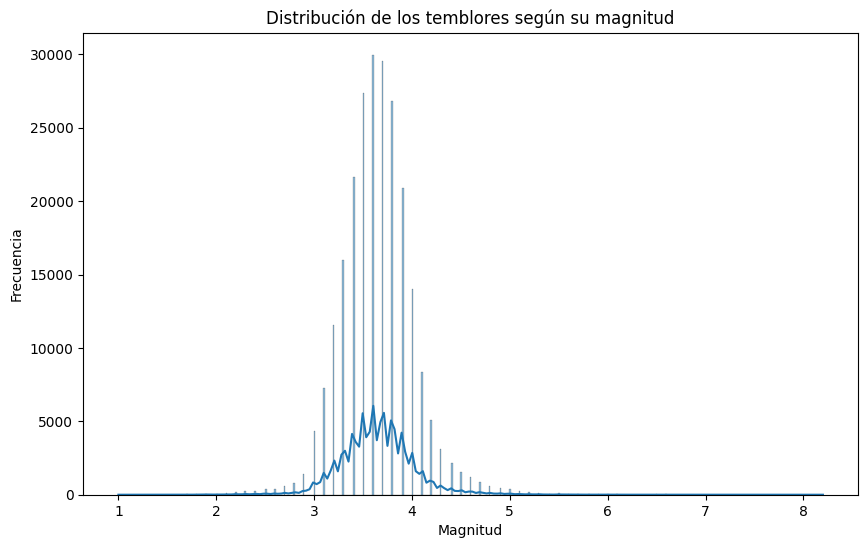

In [41]:
# ¿Cuál es la distribución de los temblores según su magnitud?
plt.figure(figsize=(10, 6))
sns.histplot(data=datos_completos, x='Magnitud', kde=True)

# Configurar el título y etiquetas de los ejes
plt.title('Distribución de los temblores según su magnitud')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

* ¿Cuáles son los temblores más recientes registrados?

In [42]:
# ¿Cuáles son los temblores más recientes registrados?
datos_completos.tail(100)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Dias_De_La_Semana,Mes_Numerico
270628,2022-12-30,14:14:55,3.6,15.8242,-96.2598,48.5,"15 km al NOROESTE de CRUCECITA, OAX",4,12
270630,2022-12-30,14:47:57,3.4,16.6060,-99.2937,8.5,"23 km al SURESTE de SAN MARCOS, GRO",4,12
270631,2022-12-30,14:59:40,3.8,15.1518,-94.5558,18.9,"133 km al SURESTE de SALINA CRUZ, OAX",4,12
270632,2022-12-30,15:09:09,3.9,16.6482,-99.6500,2.7,"32 km al SUROESTE de SAN MARCOS, GRO",4,12
270633,2022-12-30,15:44:14,3.4,30.8748,-116.1280,5.6,"21 km al NOROESTE de VICENTE GUERRERO, BC",4,12
...,...,...,...,...,...,...,...,...,...
275326,2023-03-06,13:53:21,4.0,18.0800,-104.2000,2.9,"98 km al SUR de CD DE ARMERIA, COL",0,3
276225,2023-03-18,13:11:18,3.6,19.5400,-102.3000,14.7,"12 km al ESTE de PERIBAN, MICH",5,3
278328,2023-04-18,22:55:31,5.1,17.2200,-101.1200,16.3,"38 km al SURESTE de PETATLAN, GRO",1,4
278495,2023-04-21,03:32:46,3.5,30.7600,-114.6200,2.3,"36 km al SURESTE de SAN FELIPE, BC",4,4


* ¿Existe alguna correlación entre la profundidad del temblor y su magnitud?

<Axes: >

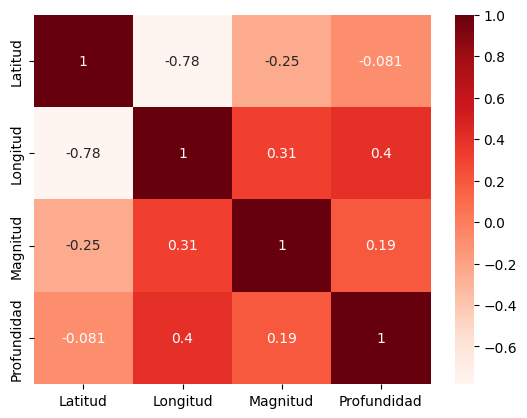

In [43]:
sns.heatmap(datos_completos[['Latitud', 'Longitud', 'Magnitud', 'Profundidad']].corr(numeric_only=True, method='spearman'), annot=True, cmap='Reds')

Se puede observar que la magnitud y longitud tienen una relación lineal positiva moderada (0.31), en el caso de la profundidad y la longitud, hay una correlación lineal positiva moderada (0.40). Finalmente, la correlación que existe entre la magnitud y la latitud es negativa débil (-0.25), lo que significa que a medida que una variable aumenta, la otra tiende a disminuir.

<Axes: xlabel='Profundidad', ylabel='Magnitud'>

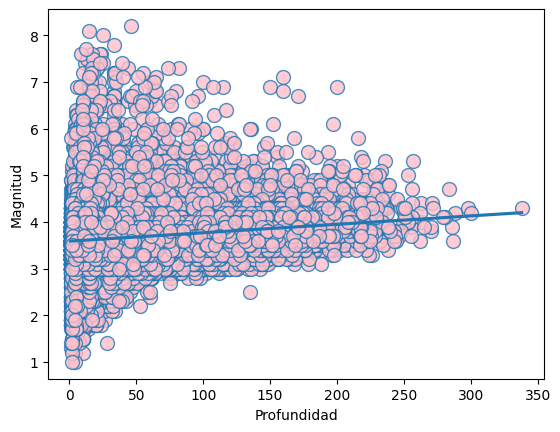

In [44]:
# Se muestran los valores de los datos gráficamente en un diagrama de dispersión (Scatter search) para analizar la relación
sns.regplot(x='Profundidad', y='Magnitud', data=datos_completos, ci=None, scatter_kws={'s':100, 'facecolor':'pink'})

Analizando el diagrama de dispersión generado entre la magnitud y profundidad, se puede decir que existe una relación lineal entre las variables, por lo que si una variable tiende a aumentar o disminuir, ocurre lo mismo con la otra de manera proporcional. Además, hay una correlación fuerte entre las variables.
Por otra parte, si pueden haber valores atrípicos debido a que hay ciertos puntos que se encuentran bastante separados del conjunto, pero estos son muy pocos comparados con con los demás.

#### Probabilidades y distribuciones

* Calcular las probabilidades de que tiemble en septiembre, dado que ya tembló y es el mes en el que mas tiembla

In [45]:
datos_completos.loc[(datos_completos['Fecha'].dt.month==9)]

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Dias_De_La_Semana,Mes_Numerico
0,1950-09-29,00:32:20,7.0,19.0000,-107.0000,60.0,"257 km al SUROESTE de PUERTO VALLARTA, JAL",4,9
12,1955-09-26,02:28:20,6.9,15.5000,-92.5000,200.0,"31 km al NOROESTE de MOTOZINTLA, CHIS",0,9
19,1961-09-01,12:50:34,6.6,13.5000,-92.6600,25.0,"141 km al SUROESTE de CD HIDALGO, CHIS",4,9
234,1974-09-01,07:49:38,4.9,13.3000,-88.9100,111.0,"382 km al SURESTE de CD HIDALGO, CHIS",6,9
235,1974-09-02,16:04:31,4.6,13.1800,-90.7500,41.0,"224 km al SURESTE de CD HIDALGO, CHIS",0,9
...,...,...,...,...,...,...,...,...,...
261532,2022-09-30,18:07:39,3.6,18.1078,-103.2820,12.3,"75 km al SUR de COALCOMAN, MICH",4,9
261533,2022-09-30,18:12:23,3.8,15.5000,-95.9780,7.2,"34 km al SURESTE de CRUCECITA, OAX",4,9
261534,2022-09-30,18:15:57,3.6,18.0888,-103.3120,8.8,"78 km al SUR de COALCOMAN, MICH",4,9
261535,2022-09-30,18:21:15,3.7,15.9855,-95.1407,26.0,"23 km al SURESTE de SALINA CRUZ, OAX",4,9


La distribución exponencial es una distribución de probabilidad continua que se utiliza para modelar el tiempo que transcurre entre eventos independientes y aleatorios que ocurren a una tasa constante. 

In [46]:
def probabilidad_exponencial(lambd, x):
    if x < 0:
        return 0
    else:
        return 1 - math.exp(-lambd * x)

lambd = 1 / 274  # tasa de ocurrencia de eventos por día (inversa de los días transcurridos)
x = 274  # número de días transcurridos desde el último temblor de septiembre

probabilidad = probabilidad_exponencial(lambd, x)*100
print(f'La probabilidad de que tiemble en septiembre utilizando los días transcurridos desde el último temblor de septiembre es de {probabilidad}%')

La probabilidad de que tiemble en septiembre utilizando los días transcurridos desde el último temblor de septiembre es de 63.212055882855765%


In [47]:
from scipy.stats import expon

def probabilidad_temblor_exponencial(tasa_media, intervalo_tiempo):
    probabilidad = 1 - expon.cdf(intervalo_tiempo, scale=1/tasa_media)
    return probabilidad

tasa_media = 1/274 # Tasa media de ocurrencia de temblores por unidad de tiempo
intervalo_tiempo = 274  # Intervalo de tiempo en el que deseas calcular la probabilidad

probabilidad_temblor = probabilidad_temblor_exponencial(tasa_media, intervalo_tiempo)

print("Probabilidad de que ocurra un temblor en el intervalo de tiempo: %", probabilidad_temblor*100)

Probabilidad de que ocurra un temblor en el intervalo de tiempo: % 36.787944117144235


MODELO TRATANDO DE PREDECIR

In [53]:
from sklearn.model_selection import train_test_split

In [50]:
columnas = ['Longitud', 'Profundidad', 'Magnitud', 'Latitud', 'Dias_De_La_Semana']

In [51]:
training = datos_completos.sample(frac = 0.8,random_state = 420)
X_train = training[columnas]
y_train = training['Mes_Numerico']
X_test = datos_completos.drop(training.index)[columnas]

In [54]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)

In [57]:
example2 = pd.DataFrame({
'Longitud': [-94.10, -101.12,-103.2690, -107,-98.12,-89.1980,-97.15], 
'Profundidad':[45.9, 16.3, 12.1, 60,33,13,80],
'Magnitud': [8.1, 8.2, 7.7, 7, 7.2, 7.5,6.8],
'Latitud':[18.419, 14.761,18.2377, 19,17.22,15.262,17.72],
'Dias_De_La_Semana':[3,3,0,4,3,2,6]
})  
# Realizar la predicción con el modelo entrenado
RFC_Predict = RFC_Model.predict(example2)

# Imprimir el resultado de la predicción
print("Predicción RFC:", RFC_Predict)

Predicción RFC: [ 8  4  9  9 12  2  5]


In [58]:
df = datos_completos.loc[datos_completos['Fecha'].dt.month==9]
print(f'La moda de latitud es de  : {df["Latitud"].mode()}')
print(f'La moda de longitud es de  : {df["Longitud"].mode()}')
print(f'La moda de profundidad es de  : {df["Profundidad"].mode()}')
print(f'La moda de magnitud es de  : {df["Magnitud"].mode()}')

La moda de latitud es de  : 0    16.87
Name: Latitud, dtype: float64
La moda de longitud es de  : 0   -100.1
Name: Longitud, dtype: float64
La moda de profundidad es de  : 0    10.0
Name: Profundidad, dtype: float64
La moda de magnitud es de  : 0    3.7
Name: Magnitud, dtype: float64


In [59]:
example2 = pd.DataFrame({
'Longitud': [-100.1,-100.1,-100.1,-100.1,-100.1,-100.1,-100.1, -115.17], 
'Profundidad':[10,10,10,10,10,10,10,10],
'Magnitud': [6, 6.5, 5.5, 7.1, 7.9, 7.2, 8,7.6],
'Latitud':[16.87,16.87,16.87,16.87,16.87,16.87,16.87,16.7],
'Dias_De_La_Semana':[0,1,2,3,4,5,6,4]
})  
# Realizar la predicción con el modelo entrenado
RFC_Predict = RFC_Model.predict(example2)

# Imprimir el resultado de la predicción
print("Predicción RFC:", RFC_Predict)

Predicción RFC: [ 9  9  9  9  9  9 12  5]


In [60]:
example2 = pd.DataFrame({
'Longitud': [-98.0998, -98.0828, -98.1432], 
'Profundidad':[8.4 ,8.8,11.6],
'Magnitud': [3.9, 4.0, 3.8],
'Latitud':[16.2410, 16.2339, 16.2823],
'Dias_De_La_Semana':[6 ,3,1]
})  
# Realizar la predicción con el modelo entrenado
RFC_Predict = RFC_Model.predict(example2)

# Imprimir el resultado de la predicción
print("Predicción RFC:", RFC_Predict)

Predicción RFC: [2 9 9]


In [61]:
!pip install ttkthemes


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from ttkthemes import ThemedStyle

# Función para realizar la predicción y mostrar el resultado
def predecir():
    # Obtener los valores ingresados por el usuario
    longitud = float(entry_longitud.get())
    profundidad = float(entry_profundidad.get())
    magnitud = float(entry_magnitud.get())
    latitud = float(entry_latitud.get())
    dias_semana = int(entry_dias_semana.get())

    # Crear el DataFrame con los valores ingresados
    example2 = pd.DataFrame({
        'Longitud': [longitud],
        'Profundidad': [profundidad],
        'Magnitud': [magnitud],
        'Latitud': [latitud],
        'Dias_De_La_Semana': [dias_semana]
    })

    # Realizar la predicción con el modelo entrenado
    RFC_Predict = RFC_Model.predict(example2)

    # Mostrar el resultado de la predicción en una ventana emergente
    messagebox.showinfo("Resultado de la predicción", f"Predicción RFC: {RFC_Predict}")


# Crear la ventana principal
window = tk.Tk()
window.title("Predicción con modelo RFC")

# Aplicar estilo personalizado
style = ThemedStyle(window)
style.set_theme('equilux')

# Cambiar el color de fondo de la ventana
window.configure(bg='#292d3e')

# Crear etiquetas y campos de entrada para los valores del modelo
label_longitud = tk.Label(window, text="Longitud:", bg='#292d3e', fg='#ffffff')
label_longitud.pack()
entry_longitud = tk.Entry(window, bg='#ffffff')
entry_longitud.pack()

label_profundidad = tk.Label(window, text="Profundidad:", bg='#292d3e', fg='#ffffff')
label_profundidad.pack()
entry_profundidad = tk.Entry(window, bg='#ffffff')
entry_profundidad.pack()

label_magnitud = tk.Label(window, text="Magnitud:", bg='#292d3e', fg='#ffffff')
label_magnitud.pack()
entry_magnitud = tk.Entry(window, bg='#ffffff')
entry_magnitud.pack()

label_latitud = tk.Label(window, text="Latitud:", bg='#292d3e', fg='#ffffff')
label_latitud.pack()
entry_latitud = tk.Entry(window, bg='#ffffff')
entry_latitud.pack()

label_dias_semana = tk.Label(window, text="Días de la semana:", bg='#292d3e', fg='#ffffff')
label_dias_semana.pack()
entry_dias_semana = tk.Entry(window, bg='#ffffff')
entry_dias_semana.pack()

# Crear botón para realizar la predicción
btn_prediccion = tk.Button(window, text="Realizar predicción", command=predecir, bg='#ffffff', fg='#292d3e', relief=tk.RAISED)
btn_prediccion.pack()

# Bucle principal de la interfaz gráfica
window.mainloop()